<img height="100" width="420" src="https://harrogatewine.files.wordpress.com/2016/08/dsc_1149.jpg"></img>
# <font color= "red" > White Variants of the Portuguese "Vinho Verde" wine</font>
##  <u>Support Vector Machine</u>: Machine Learning Model

<h1><font color='Orange'> Table of Contents </h1></font><br>

-1. Data Description<br>
-2. Loading the packages and dataset<br>
-3. Removing null values<br>
-4. Splitting the data into Training and Test data<br>
-5. Building the SVM model<br>
-6. Predictions from the model<br>
-7. Evaluating the model<br>

### 1. Data Description

The dataset is related to white variants of the Portuguese "Vinho Verde" wine.

Input variables (based on physicochemical tests):
   1. - fixed acidity
   2. - volatile acidity
   3. - citric acid
   4. - residual sugar
   5. - chlorides
   6. - free sulfur dioxide
   7. - total sulfur dioxide
   8. - density
   9. - pH
   10. - sulphates
   11. - alcohol
   
<b> Output variable (based on sensory data): 
   12. - quality (score between 0 and 10)</b>

Our goal is to predict the quality of wine based on the features using <b><u>SVM Model</u></b>

### 2. Loading the packages and dataset

In [1]:
# Loading the packages
import requests
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset and spliting the data by newline
http_request = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv')
http_text = http_request.text.split("\n")

## Arranging the data in  form of table

In [3]:
data_input = []
for lines in http_text:
    data_input.append(lines.split(";"))
col_names =[]
for col in data_input[0]:
    col_names.append(col.strip('"'))
data_frame = pd.DataFrame(data=data_input[1:],columns=col_names).apply(pd.to_numeric)

In [4]:
data_frame.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6.0


In [5]:
data_frame.isnull().sum() # Detecting if there exists Null Values in Datasets

fixed acidity           1
volatile acidity        1
citric acid             1
residual sugar          1
chlorides               1
free sulfur dioxide     1
total sulfur dioxide    1
density                 1
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

### 3. Removing Null values

In [6]:
# Dropping the last 2 row which is all null
numrecs = data_frame.shape[0]
data_frame = data_frame.iloc[0:numrecs-2,:]

### 4. Splitting the data in Training and Test data

In [7]:
# Splitting data into label and predictors
y = data_frame["quality"]
X = data_frame[col_names[:-1]]

In [8]:
data_frame["quality"].hist()

### ** Dividing the labels into 3 splits instead of 7 categories **

In [9]:
def quality_cat(y):
    if y >6:
        return 1
    elif 4<y<=6:
        return 0
    else:
        return -1
cat_y = y.apply(quality_cat)
cat_y.value_counts()

 0    3654
 1    1060
-1     183
Name: quality, dtype: int64

In [10]:
# Scaling and Digitizing the features

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_X = ss.fit_transform(X)

### 5. Building the Model

#### Featuring Engineering & Dimentional Reduction

[0.90964319 0.0793474  0.01015482]


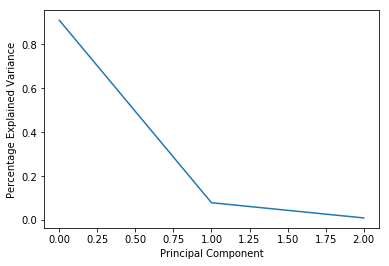

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca_model= PCA(n_components=3)
pca_model.fit(X)
print(pca_model.explained_variance_ratio_);
plt.plot(pca_model.explained_variance_ratio_);
plt.xlabel("Principal Component");
plt.ylabel("Percentage Explained Variance");
plt.show()

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, cat_y, test_size=0.25, random_state=42)

C:\Users\Mowgli\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X_test=pca_model.fit_transform(X_test) #  Transforming the X from PCA
X_train=pca_model.fit_transform(X_train)

##  Implementing SVC

In [14]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf')
clf.fit(X=X_train,y=y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 6. Predictions from the model

In [15]:
y_pred = clf.predict(X_test)

### 7. Hyperparameter Tuning

In [16]:
from sklearn.cross_validation import cross_val_score
list_cv=[3,4,5,6,7]
max_counter={}
for k in list_cv:
    score_svc = cross_val_score(clf, X_train, y_train, cv=k)
    print("K_value:: ", k)
    print("Cross Validation score : " + str(score_svc))
    print("Cross Validation Mean score : " + str(score_svc.mean()))
    max_counter.update({k:score_svc.mean()})
    print("\n")
Accuracy=max(max_counter.values())    
print("Best Accuracy for value of CV is",Accuracy)

K_value::  3
Cross Validation score : [0.75918367 0.75408497 0.75960752]
Cross Validation Mean score : 0.7576253877584467


K_value::  4
Cross Validation score : [0.76060936 0.75734494 0.75490196 0.75873362]
Cross Validation Mean score : 0.7578974708471564


K_value::  5
Cross Validation score : [0.76054422 0.76190476 0.75510204 0.76021798 0.75443383]
Cross Validation Mean score : 0.7584405675240198


K_value::  6
Cross Validation score : [0.76019576 0.75980392 0.75816993 0.74673203 0.75980392 0.75777414]
Cross Validation Mean score : 0.7570799505398117


K_value::  7
Cross Validation score : [0.75285171 0.76425856 0.76045627 0.75763359 0.75763359 0.75717017
 0.75908222]
Cross Validation Mean score : 0.7584408722219764


Best Accuracy for value of CV is 0.7584408722219764


## Accuracy of the Model

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7338775510204082

## Classification Report

In [18]:
cr = classification_report(y_test, y_pred)
print(cr)

             precision    recall  f1-score   support

         -1       0.67      0.05      0.09        40
          0       0.74      0.99      0.85       900
          1       0.40      0.01      0.03       285

avg / total       0.66      0.73      0.63      1225



## Confususion Matrix

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  2,  38,   0],
       [  1, 893,   6],
       [  0, 281,   4]], dtype=int64)